<h1> Random Forrest </h1>


In [35]:
#Importer les librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [36]:
acc_scorer = make_scorer(accuracy_score)

In [37]:
# Afficher le dataset
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


On aperçoit qu'il y a des données manquantes dans la colonne 'age'

In [39]:
# Supprime les lignes où la colonne 'Age' contient des valeurs manquantes
df.dropna(subset=['Age'], inplace=True)

# Convertit les valeurs de la colonne 'Age' en entiers
df.Age = df.Age.astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [40]:
# Transformation de la colonne 'Sex'
df.Sex = df.Sex.map({'male': 0, 'female': 1})

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [41]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
F33            3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 134, dtype: int64

La colonne 'cabin' est inutilisable car il y a quasiment que des valeurs uniques. (134) + il y des valeurs null 

In [42]:
# Suppression des colonnes inutilisables
df.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True)

df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.679272,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.536483,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


Dans la colonne 'survived' la moyenne indique environ 0.4 et vu que les valeurs sont soit0 soit 1, cela veut dire que 0.4 est égal à 40% de survivants (valeur = 1)

Text(0, 0.5, '%Survie')

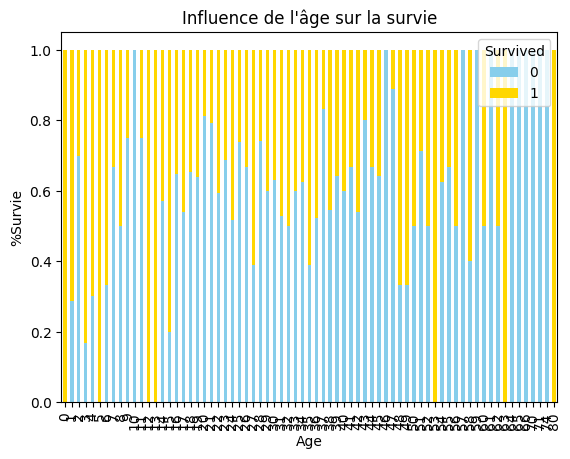

In [43]:
# Influence de l'âge sur la survie
import matplotlib.pyplot as plt

# Crée une table croisée entre 'Age' et 'Survived'
table = pd.crosstab(df['Age'], df['Survived'])

# Normalise les données par ligne pour obtenir des pourcentages et trace un graphique en barres empilées
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'gold'])

# Données pour graph
plt.title("Influence de l'âge sur la survie")
plt.xlabel('Age')
plt.ylabel('%Survie')

In [44]:
# Divise les âges en intervalles égaux 
df['AgeBand'] = pd.cut(df['Age'], 7)

# Calcule la moyenne de survie pour chaque bande d'âge, trie par ordre croissant des bandes d'âge
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\laetitia.monnier\AppData\Local\Temp\ipykernel_19380\11786522.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 11.429]",0.573529
1,"(11.429, 22.857]",0.361963
2,"(22.857, 34.286]",0.395161
3,"(34.286, 45.714]",0.417910
4,"(45.714, 57.143]",0.411765
5,"(57.143, 68.571]",0.346154
6,"(68.571, 80.0]",0.142857


In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,22,1,0,7.2500,S,"(11.429, 22.857]"
1,1,1,1,38,1,0,71.2833,C,"(34.286, 45.714]"
2,1,3,1,26,0,0,7.9250,S,"(22.857, 34.286]"
3,1,1,1,35,1,0,53.1000,S,"(34.286, 45.714]"
4,0,3,0,35,0,0,8.0500,S,"(34.286, 45.714]"


In [46]:
# Remplace les âges par une catégorie représentée par un chiffre
df.loc[ df['Age'] <= 10, 'Age'] = 0
df.loc[(df['Age'] > 10) & (df['Age'] <= 20), 'Age'] = 1
df.loc[(df['Age'] > 20) & (df['Age'] <= 30), 'Age'] = 2
df.loc[(df['Age'] > 30) & (df['Age'] <= 40), 'Age'] = 3
df.loc[(df['Age'] > 40) & (df['Age'] <= 50), 'Age'] = 4
df.loc[(df['Age'] > 50) & (df['Age'] <= 60), 'Age'] = 5
df.loc[(df['Age'] > 60) & (df['Age'] <= 70), 'Age'] = 6
df.loc[ df['Age'] > 70, 'Age'] = 7
df.drop(['AgeBand'],axis=1,inplace=True)

In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,2,1,0,7.2500,S
1,1,1,1,3,1,0,71.2833,C
2,1,3,1,2,0,0,7.9250,S
3,1,1,1,3,1,0,53.1000,S
4,0,3,0,3,0,0,8.0500,S


Text(0, 0.5, '%Survie')

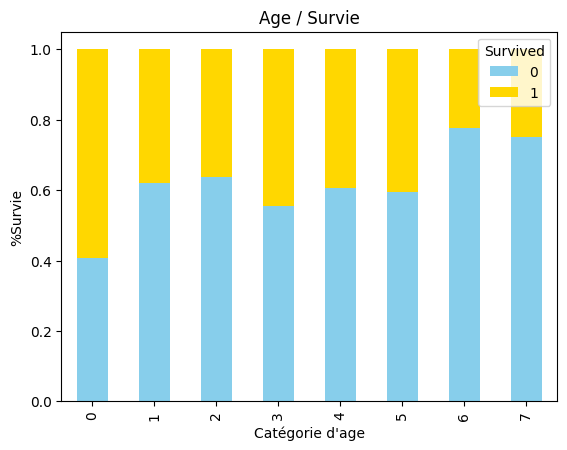

In [48]:
# Crée une table croisée entre 'Age' et 'Survived'
table= pd.crosstab(df.Age,df.Survived)

# Normalise les valeurs par ligne pour obtenir des pourcentages, puis trace un graphique en barres empilées
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'gold'])

# Données pour graph
plt.title('Age / Survie')
plt.xlabel("Catégorie d'age")
plt.ylabel('%Survie')

L'âge à un impact mais ce n'est pas flagrant

Text(0, 0.5, 'Survie')

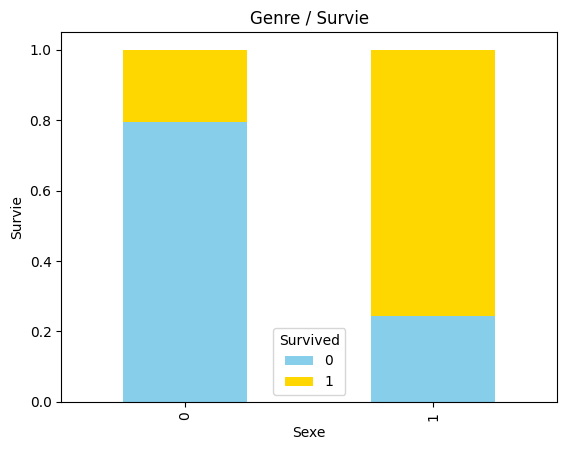

In [49]:
# Crée une table croisée entre 'Sex' et 'Survived'
table= pd.crosstab(df.Sex,df.Survived)

# Normalise les valeurs par ligne pour obtenir des pourcentages, puis trace un graphique en barres empilées
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'gold'])

# Données pour graph
plt.title('Genre / Survie')
plt.xlabel('Sexe')
plt.ylabel('Survie')

Text(0, 0.5, 'Survie')

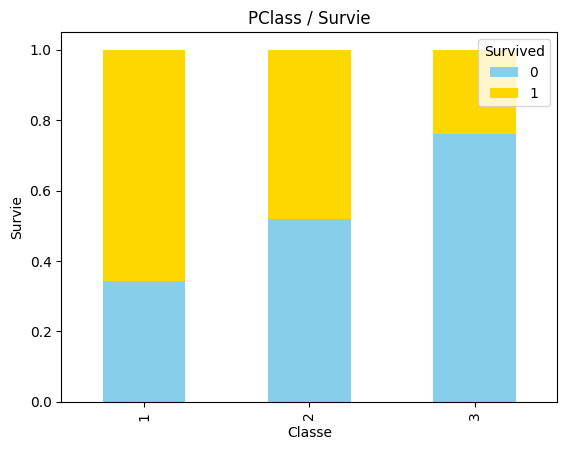

In [50]:
# Crée une table croisée entre 'Pclass' et 'Survived'
table= pd.crosstab(df.Pclass,df.Survived)

# Normalise les valeurs par ligne pour obtenir des pourcentages, puis trace un graphique en barres empilées
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'gold'])

# Données pour graph
plt.title('PClass / Survie')
plt.xlabel('Classe')
plt.ylabel('Survie')

Text(0, 0.5, 'Survie')

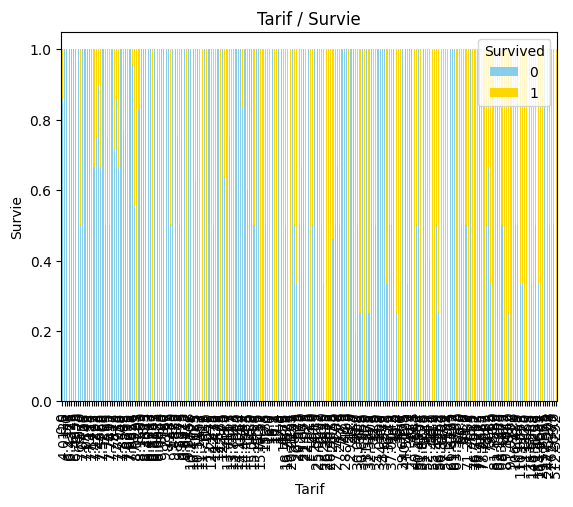

In [51]:
# Crée une table croisée entre 'Fare' et 'Survived'
table= pd.crosstab(df.Fare,df.Survived)

# Normalise les valeurs par ligne pour obtenir des pourcentages, puis trace un graphique en barres empilées
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'gold'])

# Données pour graph
plt.title('Tarif / Survie')
plt.xlabel('Tarif')
plt.ylabel('Survie')

In [52]:
# Divise les tarifs en intervalles égaux 
df['FareGroup'] = pd.qcut(df['Fare'],5)

# Calcule la moyenne de survie pour chaque bande de fare, trie par ordre croissant des bandes d'âge
df[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

C:\Users\laetitia.monnier\AppData\Local\Temp\ipykernel_19380\3568924979.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)


,FareGroup,Survived
0,"(-0.001, 7.913]",0.174825
1,"(7.913, 13.0]",0.322404
2,"(13.0, 26.0]",0.446154
3,"(26.0, 46.9]",0.413793
4,"(46.9, 512.329]",0.704225


In [53]:
df.loc[ df['Fare'] <= 7.913, 'Fare'] = 0
df.loc[(df['Fare'] > 7.913) & (df['Fare'] <= 13.0), 'Fare'] = 1
df.loc[(df['Fare'] > 13.0) & (df['Fare'] <= 26.0), 'Fare'] = 2
df.loc[(df['Fare'] > 26.0) & (df['Fare'] <= 46.9), 'Fare'] = 3
df.loc[ df['Fare'] > 46.9, 'Fare'] = 4
df['Fare'] = df['Fare'].astype(int)

df.drop(['FareGroup'], axis=1,inplace=True)

Text(0, 0.5, 'Survie')

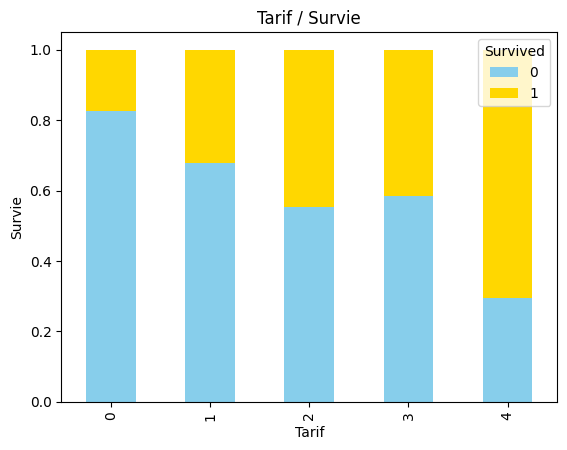

In [54]:
table= pd.crosstab(df.Fare,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'gold'])
plt.title('Tarif / Survie')
plt.xlabel('Tarif')
plt.ylabel('Survie')

Corélation entre la tarif et la classe, les graphiques sont quasiments identiques mais inversé


Text(0, 0.5, 'Survie')

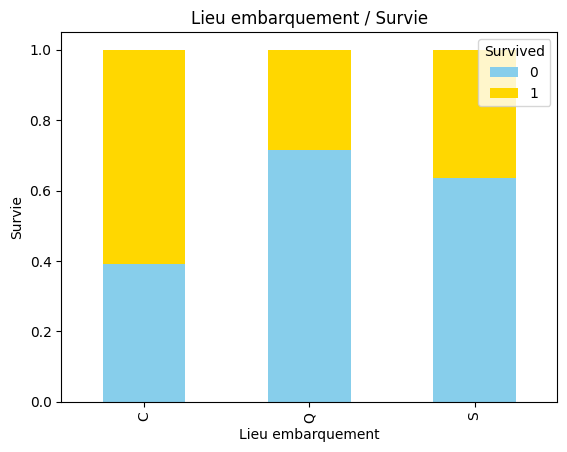

In [55]:
table= pd.crosstab(df.Embarked,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'gold'])
plt.title('Lieu embarquement / Survie')
plt.xlabel('Lieu embarquement')
plt.ylabel('Survie')

Text(0, 0.5, 'Survie')

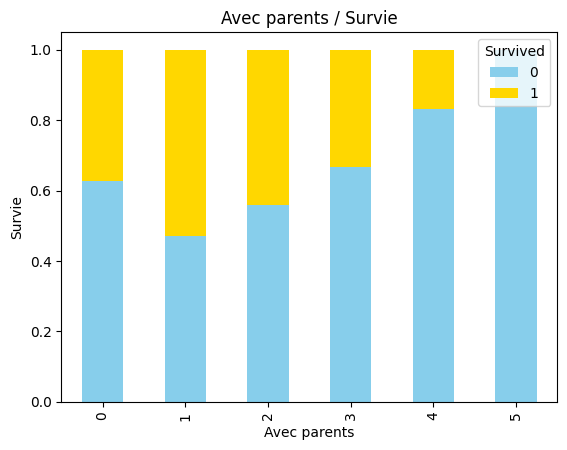

In [56]:
table= pd.crosstab(df.SibSp, df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'gold'])
plt.title('Avec parents / Survie')
plt.xlabel('Avec parents')
plt.ylabel('Survie')

Text(0, 0.5, 'Survie')

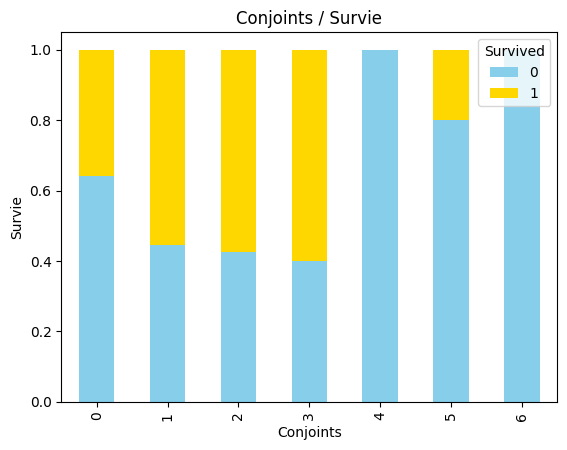

In [57]:
table= pd.crosstab(df.Parch,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'gold'])
plt.title('Conjoints / Survie')
plt.xlabel('Conjoints')
plt.ylabel('Survie')

In [58]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

Text(0, 0.5, 'Survie')

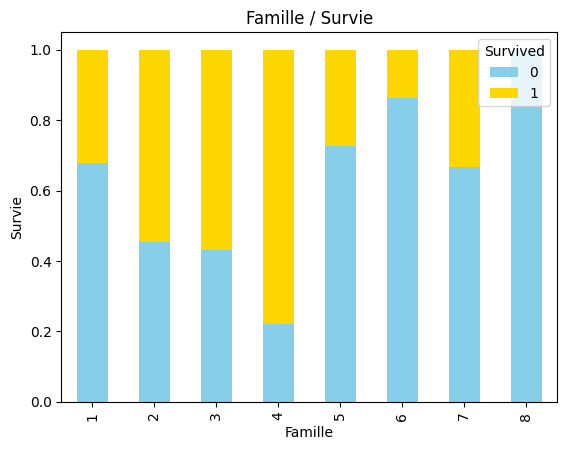

In [59]:
table= pd.crosstab(df.FamilySize,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'gold'])
plt.title('Famille / Survie')
plt.xlabel('Famille')
plt.ylabel('Survie')

In [60]:
# Suppression des colonnes car on a fait une autre 
df.drop(['SibSp','Parch'],axis='columns',inplace=True)

In [61]:
# Séparation
Features = df.drop('Survived',axis='columns')
y = df.Survived
Features.shape


(714, 6)

In [62]:
Features.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,2,0,S,2
1,1,1,3,4,C,2
2,3,1,2,1,S,1
3,1,1,3,4,S,2
4,3,0,3,1,S,1


In [63]:
# Ajustement des features
Features.tail()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
885,3,1,3,3,Q,6
886,2,0,2,1,S,1
887,1,1,1,3,S,1
889,1,0,2,3,C,1
890,3,0,3,0,Q,1


In [64]:
Features.drop(['Embarked','Pclass'],axis=1,inplace=True)
Features.head()

,Sex,Age,Fare,FamilySize
0,0,2,0,2
1,1,3,4,2
2,1,2,1,1
3,1,3,4,2
4,0,3,1,1


In [65]:
X_train, X_test, y_train, y_test = train_test_split(Features, y, test_size=0.3, random_state=0)

In [ ]:
# Initialisation d'un classifieur RandomForest
random_forest = RandomForestClassifier()

# Définition des paramètres à tester dans le Grid Search
parameters = {
    'n_estimators': [3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45],  # Nombre d'arbres dans la forêt
    'criterion': ['entropy', 'gini'],  # Critère de séparation pour les arbres
    'max_depth': [2, 3, 5, 10]  # Profondeur maximale des arbres
}

# Initialisation du GridSearchCV avec 3 plis de validation croisée et un score basé sur la précision
grid_obj = GridSearchCV(random_forest, parameters, scoring=acc_scorer, cv=3)

# Entraînement du modèle sur les données d'entraînement
grid_obj = grid_obj.fit(X_train, y_train)

# Récupération du meilleur modèle trouvé
clf = grid_obj.best_estimator_

# Affichage des meilleurs paramètres trouvés
print(grid_obj.best_estimator_)

# Entraînement du meilleur modèle sur les données d'entraînement
clf.fit(X_train, y_train)

# Affichage des scores du modèle sur les données d'entraînement, de test et de validation
print(clf.score(X_train, y_train))  # Score sur les données d'entraînement
print(clf.score(X_test, y_test))    # Score sur les données de test
print(clf.score(Features, y))      # Score sur un autre jeu de données (Features et y)



RandomForestClassifier(max_depth=5, n_estimators=30)
0.8316633266533067
0.813953488372093
0.8263305322128851
